
# Project: Investigate a Dataset - [TMDB Movie Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>  This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
columns
1.  id: movie id
2.  imdb_id: movie id on imdb
3.  popularity: popularity of the movie in numbers
4.  budget: movie budget
5.  revenue: movie revenue
6.  original_title: movie title
7.  cast: movie cast
8.  homepage: link for the web page for the movie
9.  director: movie director
10. tagline: secondary title for the movie 
11. keywords: movie'keywords
12. overview: some lines describe the movie
13. runtime: movie runtime 
14. genres: movie gener
15. production_companies: movie production companies
16. release_date: the date that the movie was releaded 
17. vote_count: count of the people
18. vote_average: vote average 
19. release_year: year that the movie was releaded
20. budget_adj: budget according the Inflation rate
21. revenue_adj: revenue according the Inflation rate
    
### Question(s) for Analysis
1. how the movie revenue differ according (budget, average votes, popularity)
2. What is the top 10 director appeared in the popular movies and the most ones contributed in average votes?
3. What is the most appearing actors in the popular movies?
4. What is the most appearing production companies in the popular movies and the most ones contributed in average votes?
5. What is the top 20 geners higher revenue in the popular movies?
6. What is the top 20 keywords appeared in the popular movies? 
 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [2]:
# Loading data 
df= pd.read_csv('tmdb-movies.csv')

Investigating the Dataset

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape

(10866, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Based on the Investigation it's clear that the data have 5 rows and 21 columns,and there are null values,and there are irrelevant columns 


### Data Cleaning

 

In [6]:
df.drop(['id','imdb_id','homepage','tagline','overview'], axis=1 ,inplace=True)

droping irrelevant columns

In [7]:
# checking the null values
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   keywords              9373 non-null   object 
 7   runtime               10866 non-null  int64  
 8   genres                10843 non-null  object 
 9   production_companies  9836 non-null   object 
 10  release_date          10866 non-null  object 
 11  vote_count            10866 non-null  int64  
 12  vote_average          10866 non-null  float64
 13  release_year          10866 non-null  int64  
 14  budget_adj            10866 non-null  float64
 15  revenue_adj        

there are columns have null values and according the info() the null values have object as a dtype

In [9]:
#filling the null values 
df.fillna('unknown_value',inplace = True)

In [10]:
df['budget'].min()

0

budget can not be zero so we'll creat a new dataframe without those rows and use it when the budget is the independent variable

In [11]:
df_budget_equal_zero = df[df['budget'] == 0]
df_used_for_budget = df.drop(list(df_budget_equal_zero.index), axis=0)

<a id='eda'></a>
## Exploratory Data Analysis






In [12]:
# exploring the data
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [13]:
# shape after Cleaning 
df.shape

(10866, 16)

In [14]:
df.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


defining an important functions

In [15]:
def remove_unknown_value(column):
    '''removing the unknown values from a specific column
    '''
    df_of_unknown_values = df[df[column] == 'unknown_value']
    df_dd = df.drop(list(df_of_unknown_values.index), axis=0)
    return df_dd

In [16]:
def popularity_fun(dataf):
    '''creating a new dataframe with movies have popularity more than the median
    '''
    popularity_df = dataf[dataf['popularity'] >= 0.385512]
    df_pop_sorted = popularity_df.sort_values(by='popularity', ascending=False)
    return df_pop_sorted

In [17]:
def split_fun(sorted_df, column):
    '''spliting the column with values contains | and retunt them in a pandas series 
    '''
    words = []
    for word in sorted_df[column] :
        words.extend(word.split('|'))
    words = pd.Series(words)
    return words

### Research Question 1 
### how the movie revenue differ according (budget, average votes, popularity)

studying the relation between revenue and three important factors(budget, average votes, popularity), and because they are all numerical i will use the scatter plot, and in the rest of the report i will studying the relation between other factors and the(budget, average votes, popularity)factors.

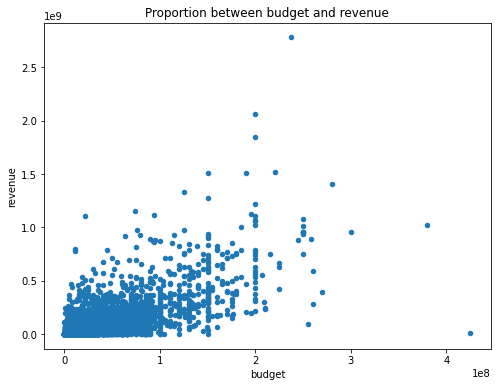

In [18]:
df_used_for_budget.plot(x="budget", y="revenue", kind="scatter", figsize = (8,6))
plt.ylabel('revenue')
plt.xlabel('budget')
plt.title('Proportion between budget and revenue');

most of low budget movies heve low revenue, middle and quite high movies' budget have a big chance to get high revenue 

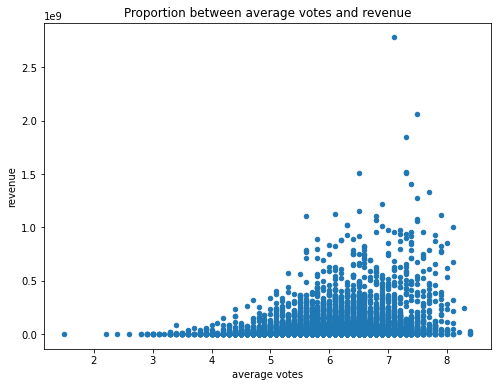

In [19]:
df_used_for_budget.plot(x="vote_average", y="revenue", kind="scatter", figsize = (8,6))
plt.ylabel('revenue')
plt.xlabel('average votes')
plt.title('Proportion between average votes and revenue');

low average votes have no chance with a good revenue, 
the movies with high average votes have a big chance to get a high revenue

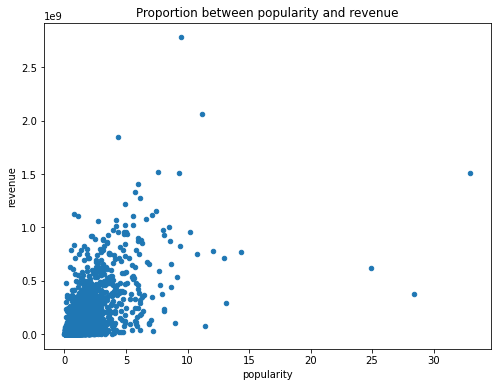

In [20]:
df_used_for_budget.plot(x="popularity", y="revenue", kind="scatter", figsize = (8,6))
plt.ylabel('revenue')
plt.xlabel('popularity')
plt.title('Proportion between popularity and revenue');

popularity have a positive correlation with revenue but popularity above 15 is not have the expected revenue

### Research Question 2  
### What is the top 10 director appeared in the popular movies and the most ones contributed in average votes?

studying the relation between directors and average votes, it will be done in two ways and it will be explaned next.

In [21]:
# removing unknown values 
df_for_directors = remove_unknown_value('director')

I'll use the popular movies in this section and find the top 10 director in number of appearing and it will be a way to know how successful those directors.

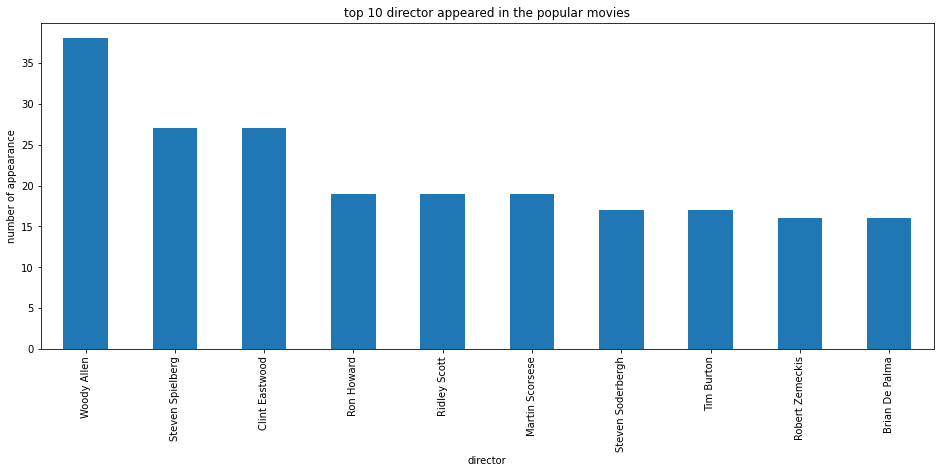

In [22]:
df_for_directors = popularity_fun(df_for_directors)
top10_apperance_directors = df_for_directors['director'].value_counts().head(10)
top10_apperance_directors.plot(kind = 'bar' ,figsize=(16,6))
plt.ylabel('number of appearance',)
plt.xlabel('director')
plt.title('top 10 director appeared in the popular movies');

I'll use the popular movies in this section too and find the top 20 director in average votes and it will be another way to know how successful those directors.

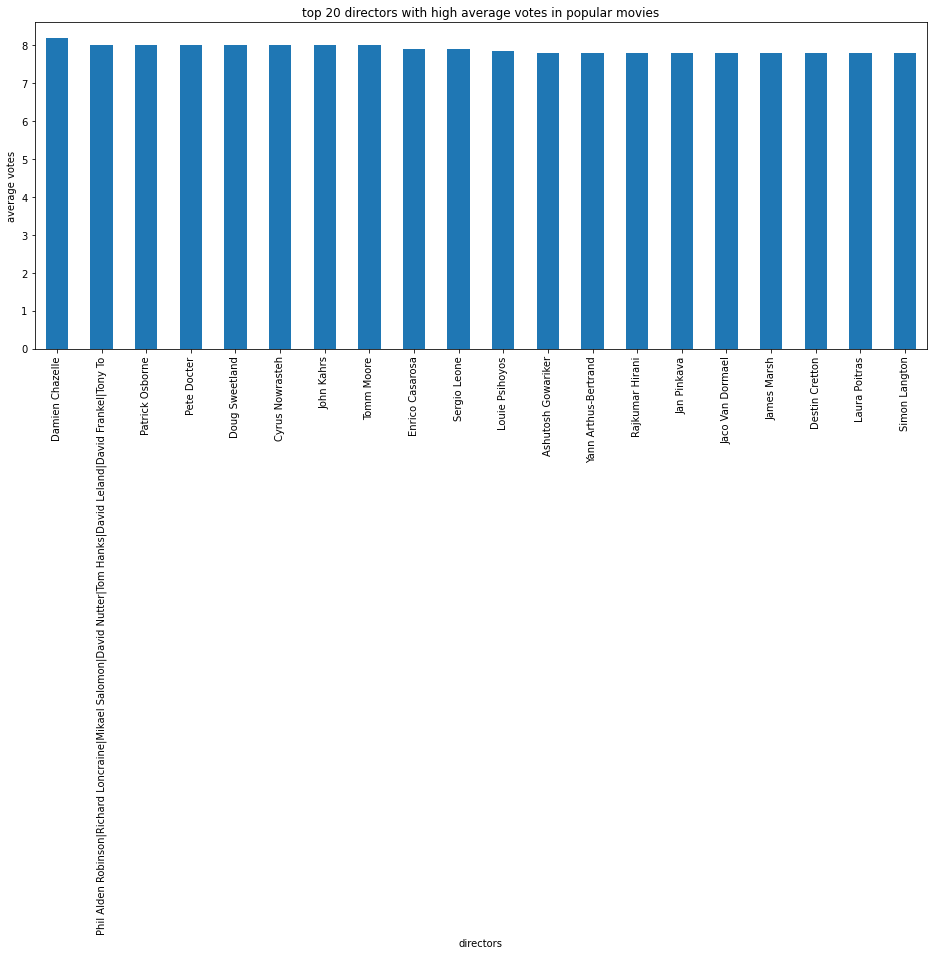

In [23]:
directors_with_vote_average =df_for_directors.groupby('director').vote_average.mean()
top20_directors = directors_with_vote_average.sort_values(ascending=False).head(20)
top20_directors.plot(kind = 'bar',figsize = (16,6))
plt.ylabel('average votes',)
plt.xlabel('directors')
plt.title('top 20 directors with high average votes in popular movies');

### Research Question 3 
### What is the most appearing actors in the popular movies?

I'll use the popular movies in this section too and find the most appearing actors and it will be a way to know how successful those actors, and they should be in consedration if you want a successful movie.

In [24]:
# removing unknown values
df_for_cast = remove_unknown_value('cast')

In [25]:
df_for_cast = popularity_fun(df_for_cast)

In [26]:
Actors = split_fun(df_for_cast, 'cast')
top_20Actors = Actors.value_counts().head(20)

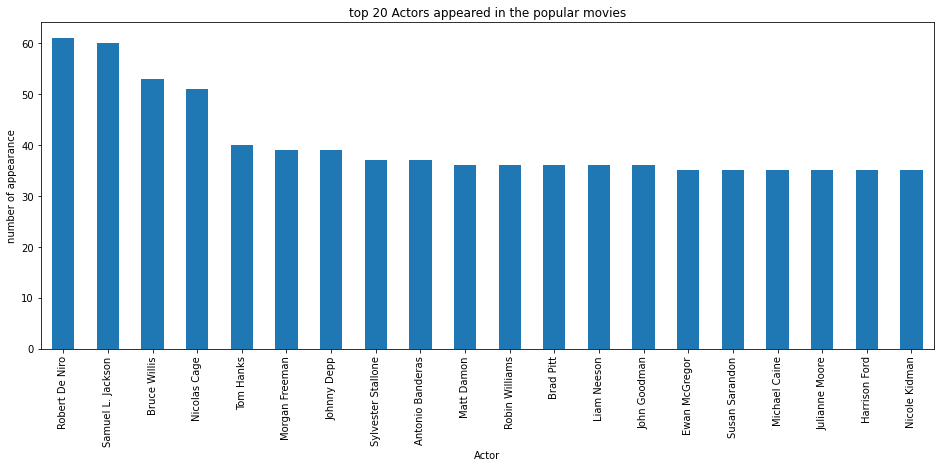

In [27]:
top_20Actors.plot(kind = 'bar' ,figsize=(16,6))
plt.ylabel('number of appearance',)
plt.xlabel('Actor')
plt.title('top 20 Actors appeared in the popular movies');

### Research Question 4  
### What is the most appearing production companies in the popular movies and the most ones contributed in average votes?

production companies is an important factor and it will be discused in two ways.

In [28]:
# removing unknown values
df_for_production_companies = remove_unknown_value('production_companies')

In [29]:
df_for_production_companies = popularity_fun(df_for_production_companies)

I'll use the popular movies in this section and find the top 10 production companies in number of appearing and it will be a way to know how successful those production companies.

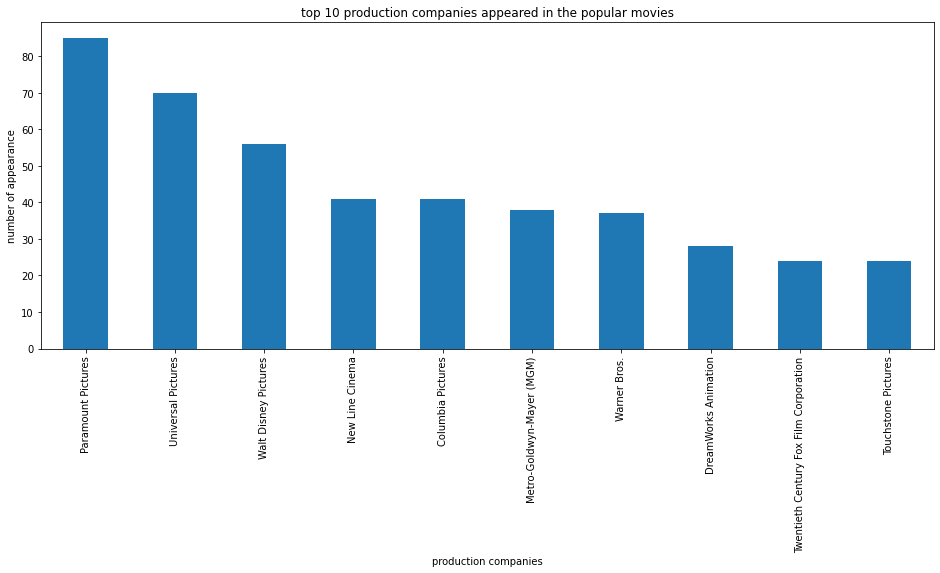

In [30]:
top10_apperance_production_companies = df_for_production_companies['production_companies'].value_counts().head(10)
top10_apperance_production_companies.plot(kind = 'bar' ,figsize=(16,6))
plt.ylabel('number of appearance',)
plt.xlabel('production companies')
plt.title('top 10 production companies appeared in the popular movies');

In [31]:
dftop_20production_companies = df_for_production_companies.head(20)

in this section i will find the top 20 production companies there names are connected to the average vote.

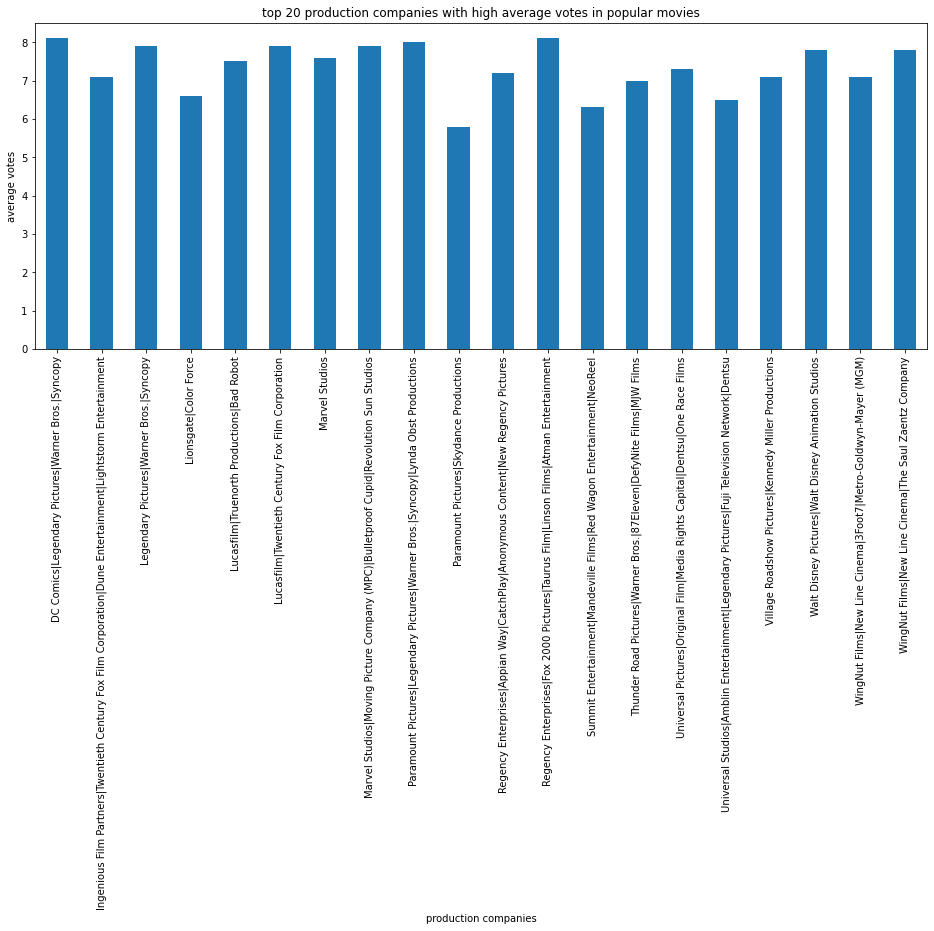

In [32]:
dftop_20production_companies_with_vote_average = dftop_20production_companies.groupby('production_companies').vote_average.mean()
dftop_20production_companies_with_vote_average.plot(kind = 'bar',figsize = (16,6))
plt.ylabel('average votes',)
plt.xlabel('production companies')
plt.title('top 20 production companies with high average votes in popular movies');

### Research Question 5 
### What is the top 20 geners higher revenue in the popular movies?

In [33]:
# removing unknown values
df_for_genres = remove_unknown_value('genres')

In [34]:
df_for_genres = popularity_fun(df_for_genres)

in this section i will find the top 20 geners have the attention of the movies makers and poeple.

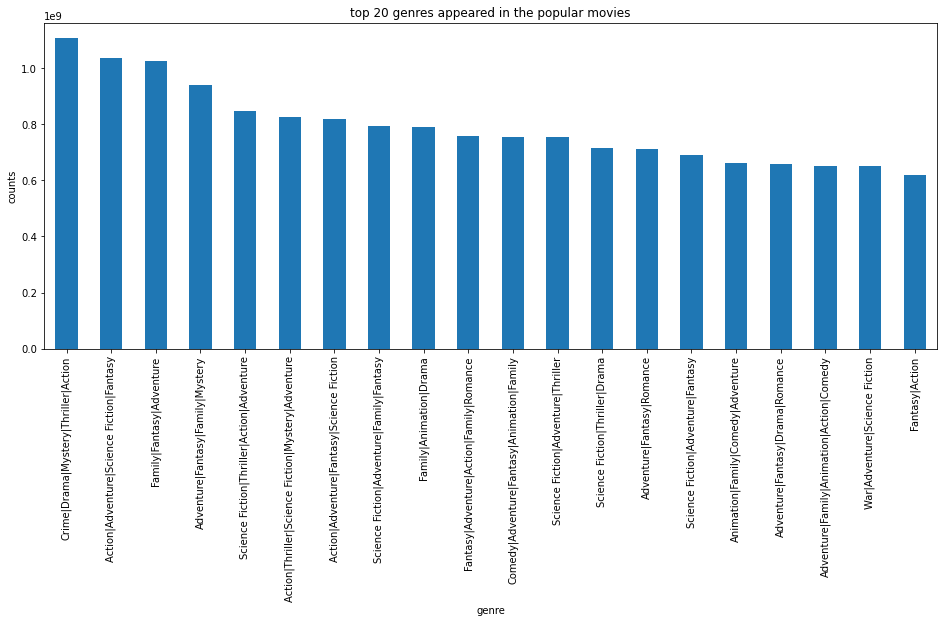

In [35]:
df_for_genres_with_revenue =df_for_genres.groupby('genres').revenue.mean()
dftop_20genres = df_for_genres_with_revenue.sort_values(ascending=False).head(20)
dftop_20genres.plot(kind = 'bar',figsize = (16,6))
plt.ylabel('counts',)
plt.xlabel('genre')
plt.title('top 20 genres appeared in the popular movies');

### Research Question 6 
### What is the top 20 keywords appeared in the popular movies?

In [36]:
# removing unknown values
df_for_keywords = remove_unknown_value('keywords')

In [37]:
df_for_keywords = popularity_fun(df_for_keywords)

In [38]:
keywords = split_fun(df_for_keywords, 'keywords')

in this section i will find the top 20 keywords that attract the poeple.

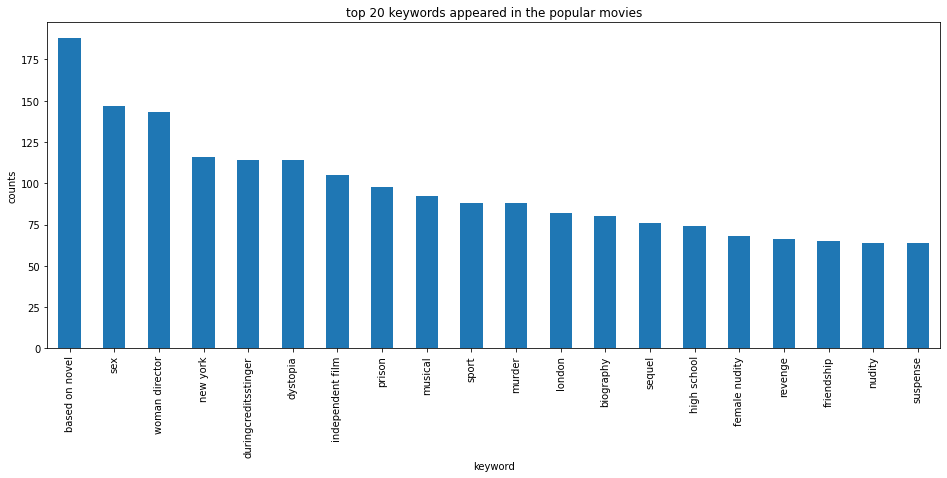

In [39]:
top_20keywords = keywords.value_counts().head(20)
top_20keywords.plot(kind = 'bar',figsize = (16,6))
plt.ylabel('counts',)
plt.xlabel('keyword')
plt.title('top 20 keywords appeared in the popular movies');

<a id='conclusions'></a>
## Conclusions

1. middle and quite high movies' budget have a big chance to get high revenue.
2. the movies with high average votes have a big chance to get a high revenue and for that reason the factors affectes rating will be considered
3. popularity have a positive correlation with revenue but popularity above 15 is not have the expected revenue
##### the factors leads to a successful  movie 
associated with a middle or quite high budget you will need 
1. popular director and you have the most popular ones above and top 20 directors with high average votes in popular movies.
2. popular actor and you have top 20 Actors appeared in the popular movies.
3. popular production company and you have top 20 production companies with high average votes in popular movies.
4. and you have the top 20 genres gained a revenue and the top 20 keyword appeared in the popular movies to help whit the movie type

### Limitations
1. budget columns contain very big number of zeroes.
2. there is no factor can indicat how the actor affect the movie, factors like his wages or popularity
